<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/cifar10_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing data

In [13]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [15]:
x_train = tf.image.resize(x_train, (75, 75))
x_test  = tf.image.resize(x_test, (75, 75))

In [16]:
x_train.shape

TensorShape([50000, 75, 75, 3])

In [17]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [18]:
import matplotlib.pyplot as plt
def imageshow(index):
  plt.figure(figsize=(10,3))
  plt.imshow(x_train[index])
  plt.title(class_names[y_train[index][0]])
  plt.show()

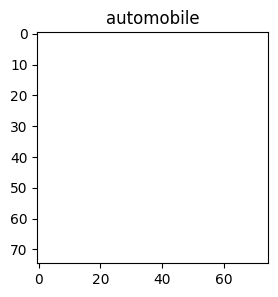

In [19]:
imageshow(10000)

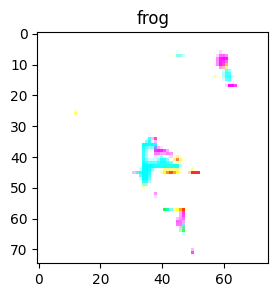

In [20]:
imageshow(5000)

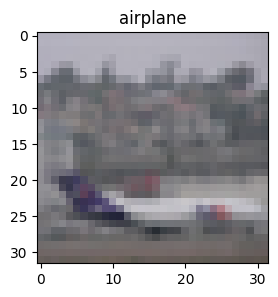

In [ ]:
imageshow(30000)

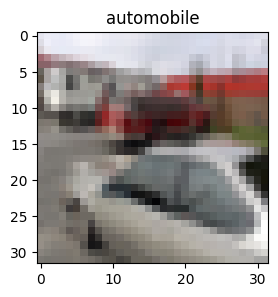

In [ ]:
imageshow(49999)

### Data augmentation

In [21]:
from tensorflow.keras.utils import to_categorical

# Convert labels from integer (0-9) to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_train)

(50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [23]:
train_data = train_data.flow(x_train, y_train, batch_size=32)
test_data = test_data.flow(x_test, y_test, batch_size=32)

### preparing for callbacks

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=5,            # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.


In [25]:
callbacks_list = [
    early_stopping,
    tensorboard
]

### making model from scratch

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential([
    Conv2D(128, (3,3), activation='relu',padding="same", input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu',padding="same", input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu',padding="same"),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu',padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │              

 Total params: 962,794 (3.67 MB)

 Trainable params: 961,834 (3.67 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=25,
                            validation_data=(test_data),
                            validation_steps=(len(test_data)),
                    callbacks = callbacks_list )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.3853 - loss: 1.6936 - val_accuracy: 0.5368 - val_loss: 1.3169
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5837 - loss: 1.1760 - val_accuracy: 0.6352 - val_loss: 1.0658
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.6489 - loss: 1.0042 - val_accuracy: 0.6828 - val_loss: 0.9338
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6892 - loss: 0.8987 - val_accuracy: 0.6884 - val_loss: 0.9059
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7125 - loss: 0.8379 - val_accuracy: 0.6680 - val_loss: 1.0182
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7281 - loss: 0.7808 - val_accuracy: 0.7508 - val_loss: 0.7458
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7478 - loss: 0.7431 - val_accuracy: 0.5797 - val_loss: 1.3792
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7602 -

In [ ]:
model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8391 - loss: 0.4800


[0.4780755341053009, 0.8395000100135803]

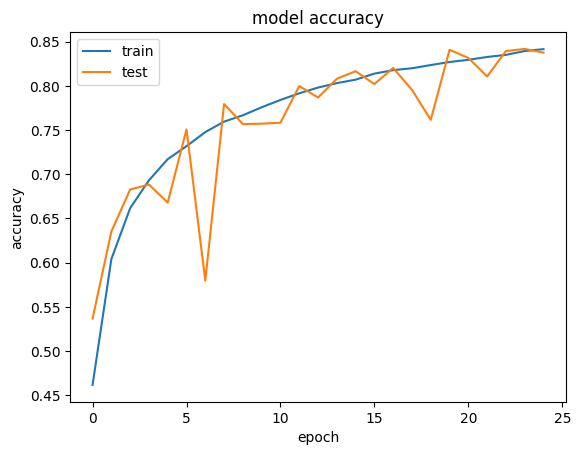

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

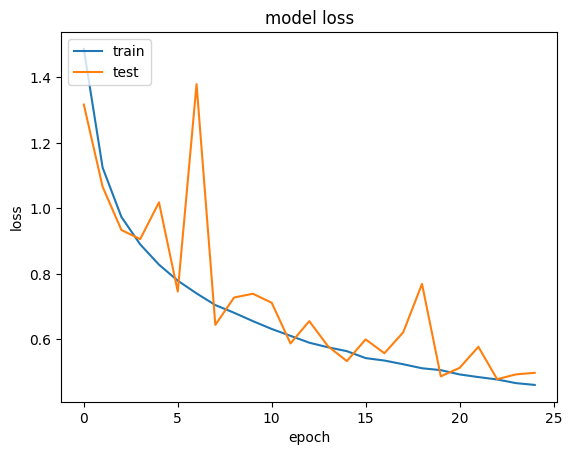

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Trying something
In this model i will put the filters in ascending order in 'Conv2d' to see is there any improvement in accuracy
I got this idea after reading some research papers

In [12]:
model_2 = Sequential([
    Conv2D(32, (3,3), activation='relu',padding="same", input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu',padding="same", input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(124, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(124, (3,3), activation='relu',padding="same"),
    BatchNormalization(),
    Conv2D(124, (3,3), activation='relu',padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

model_2.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=25,
                            validation_data=(test_data),
                            validation_steps=(len(test_data)),
                    callbacks = callbacks_list )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 27ms/step - accuracy: 0.3977 - loss: 1.7009 - val_accuracy: 0.5603 - val_loss: 1.3615
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 22ms/step - accuracy: 0.6125 - loss: 1.1102 - val_accuracy: 0.6216 - val_loss: 1.1372
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6861 - loss: 0.9261 - val_accuracy: 0.7167 - val_loss: 0.8221
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7231 - loss: 0.8240 - val_accuracy: 0.7310 - val_loss: 0.8276
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7488 - loss: 0.7454 - val_accuracy: 0.7101 - val_loss: 0.8553
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7643 - loss: 0.6990 - val_accuracy: 0.7597 - val_loss: 0.7289
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7796 - loss: 0.6620 - val_accuracy: 0.7937 - val_loss: 0.6333
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7879 -

In [13]:
model_2.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8044 - loss: 0.5869


[0.5984058380126953, 0.79830002784729]

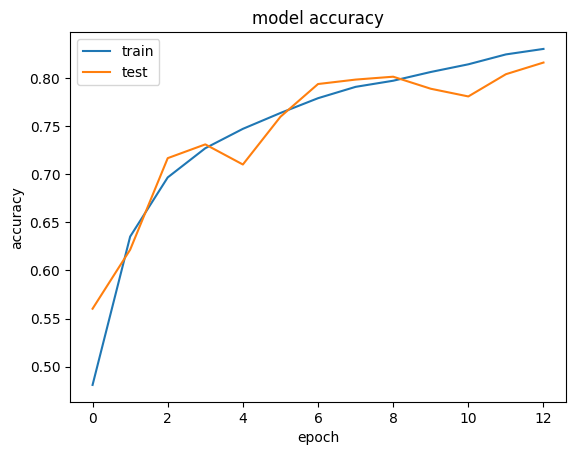

In [16]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

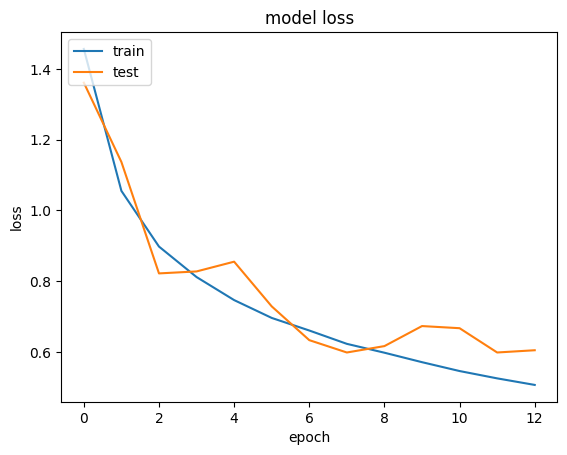

In [15]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### making model using transfer learning(resnet)
this will show us the power of transfer learning and tell the without training not much of the parameters we can get good accuracy

In [17]:
from tensorflow.keras.applications import ResNet50V2

In [18]:
#resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [21]:
num_classes = 10

base_model = ResNet50V2(
    weights='imagenet',        # Load weights pre-trained on ImageNet.
    include_top=False,         # Do not include the ImageNet classifier at the top.
    input_shape=(32,32,3)
)

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

# for layer in base_model.layers[-10:]:  # Unfreeze last 10 layers
#     layer.trainable = True

# Create a new model on top of the base model
inputs = tf.keras.Input(shape=(32,32,3))
# Set training=False to avoid updating BatchNorm statistics of the base model
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Reduce each feature map to a single value
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)                # Add dropout for regularization
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # New classifier head

# Combine the inputs and outputs into a new model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 1, 1, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,321,674 (100.41 MB)

 Trainable params: 6,172,938 (23.55 MB)

 Non-trainable params: 20,148,736 (76.86 MB)

In [22]:
resnet_history =  model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=20,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks = callbacks_list
                            )

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.2611 - loss: 2.0730 - val_accuracy: 0.3714 - val_loss: 1.8556
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.3500 - loss: 1.8654 - val_accuracy: 0.4067 - val_loss: 1.7119
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.3625 - loss: 1.8244 - val_accuracy: 0.4142 - val_loss: 1.6794
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.3745 - loss: 1.7933 - val_accuracy: 0.4300 - val_loss: 1.6564
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.3810 - loss: 1.7669 - val_accuracy: 0.4320 - val_loss: 1.6391
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.3904 - loss: 1.7604 - val_accuracy: 0.4355 - val_loss: 1.6256
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.3926 - loss: 1.7402 - val_accuracy: 0.4475 - val_loss: 1.5967
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4011 -

KeyboardInterrupt: 

In [ ]:
  model.evaluate(test_data)

In [ ]:
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [28]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

In [29]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 75, 75, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 37, 37, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 37, 37, 32)     │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 37, 37, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 35, 35, 32)     │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 35, 35, 32)     │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 35, 35, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 35, 35, 64)     │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 35, 35, 64)     │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 35, 35, 64)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 17, 17, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 17, 17, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 17, 17, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 17, 17, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 22,329,898 (85.18 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

inception_history =  model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=20,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks = callbacks_list
                            )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 75ms/step - accuracy: 0.4925 - loss: 1.4554 - val_accuracy: 0.5996 - val_loss: 1.1549
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 66ms/step - accuracy: 0.5813 - loss: 1.1830 - val_accuracy: 0.6131 - val_loss: 1.1074
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 67ms/step - accuracy: 0.6036 - loss: 1.1296 - val_accuracy: 0.6226 - val_loss: 1.0815
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6158 - loss: 1.0988 - val_accuracy: 0.6274 - val_loss: 1.0660
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6228 - loss: 1.0739 - val_accuracy: 0.6313 - val_loss: 1.0626
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6286 - loss: 1.0499 - val_accuracy: 0.6326 - val_loss: 1.0549
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6385 - loss: 1.0294 - val_accuracy: 0.6372 - val_loss: 1.0410
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 

In [32]:
  model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6569 - loss: 1.0084


[1.0200300216674805, 0.6528000235557556]

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit